**Welcome!**

**Thanks to LendingClub.com for making the data publicly available**

Description: The data covers the 9,578 loans funded by the platform between May 2007 and February 2010. The interest rate is provided to us for each borrower. 

So we’ll address the second question indirectly by trying to predict if the borrower will repay the loan by its mature date or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree


In [3]:
loans = pd.read_csv('loan_data-Copy1.csv')

In [4]:
# Terms for my use ;-)
# credit.policy - If 1-> The customer meets the credit underwriting criterion
# int rates - higher in value if person found to be more riskier.
# installment - money owed by borrower each month.
# log.annual.inc - salary (annual) reported by the borrower
# dti - debt to ratio of borrower
# fico : FICO credit score...not sure what that means
# days.with.cr.line - Number of days the borrower has had a credit line
# revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
# revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
# inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
# delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
# pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)

# not.fully.paid: is what we need to determine - whether the borrower will default 

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**It looks like we have only one categorical feature (“purpose”)**

Hmm...

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


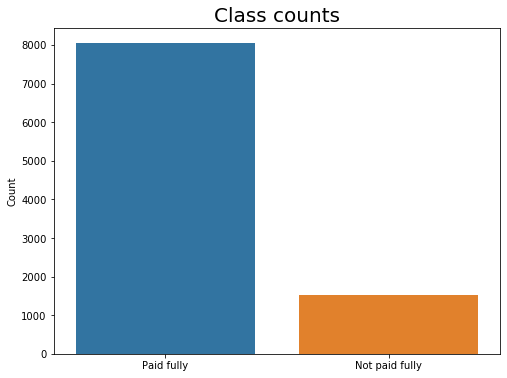

In [14]:
pos = loans[loans["not.fully.paid"] == 1].shape[0]
neg = loans[loans["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loans["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

Seems like the data set is pretty imbalanced as expected where positive examples (“not paid fully”) are only 19%.

Text(0.5, 0, 'FICO')

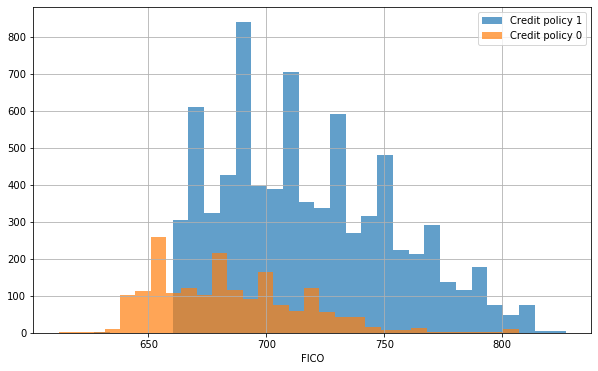

In [15]:
# sns.set()
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins = 30,alpha = 0.7, label = 'Credit policy 1')
loans[loans['credit.policy'] == 0]['fico'].hist(bins = 30,alpha = 0.7,label='Credit policy 0')
plt.legend()
plt.xlabel('FICO')

In [16]:
# We notice that people with low FICO score tend to have 0 credit policy
# Anybody with a FICO score will automatically fail the credit policy

Text(0.5, 0, 'FICO')

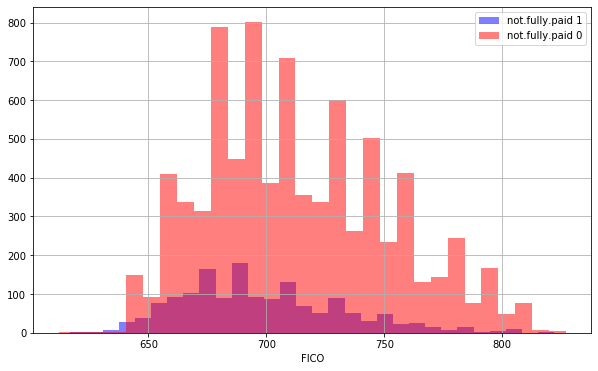

In [17]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins = 30,alpha = 0.5, color = 'blue',label = 'not.fully.paid 1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins = 30,alpha = 0.5,label='not.fully.paid 0',color = 'red')
plt.legend()
plt.xlabel('FICO')

In [18]:
# lets create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.


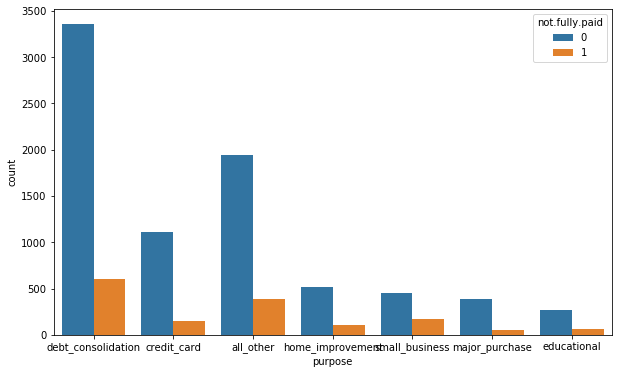

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(loans['purpose'],hue = loans['not.fully.paid'])
# missing in parameters - pallette - search more often about them

In [20]:
# we observe that debt consolidation remains to be the most popular reason for the loan

In [21]:
# Let's see the trend between FICO score and interest rate by recreating the following jointplot

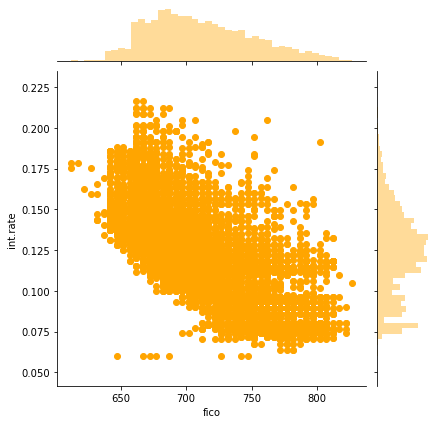

In [22]:
sns.jointplot(x=loans['fico'],y = loans['int.rate'],color = 'orange')

In [23]:
# Lets create lmplots to see if the trend differed between not.fully.paid and credit.policy. 

<Figure size 720x576 with 0 Axes>

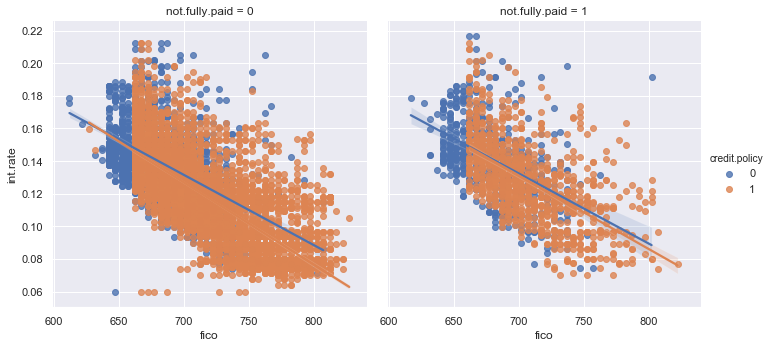

In [24]:

sns.set()
plt.figure(figsize=(10,8))
sns.lmplot(x='fico', y='int.rate', data = loans,hue ='credit.policy', col ='not.fully.paid')

In [25]:
# Setting up the data
# lets check the info of loans again
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [26]:
cat_feats = ['purpose']


In [27]:
final_data = pd.get_dummies(loans, columns=cat_feats,drop_first=True)

In [28]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=final_data.drop('not.fully.paid',axis=1)
y= final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier


In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
# Time to make the predictions from Decision Tree
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))
print('\n')
print(f'accuracy score obtained from decision tree: {accuracy_score(y_test,predictions)}')

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1997  434]
 [ 340  103]]


accuracy score obtained from decision tree: 0.7306889352818372


In [37]:
# Let's see how random forests perform 
from sklearn.ensemble import RandomForestClassifier


**Small Note about ensamble methods**

Ensemble methods can be defined as combining several different models (base learners) into final model to reduce the generalization error. It relies on the assumption that each model would look at a different aspect of the data which yield to capturing part of the truth. 

Combining good performing models the were trained independently will capture more of the truth than a single model. Therefore, this would result in more accurate predictions and lower generalization errors.

In [43]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc_pre=rfc.predict(X_test)

In [45]:
print(classification_report(y_test,rfc_pre))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.67      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.76      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



In [46]:
print(confusion_matrix(y_test,rfc_pre))

[[2426    5]
 [ 433   10]]


In [47]:
# Thanks for viewing the project.